<html>
<body>   
    
<h1>Introduction-Motivation</h1>

<p>
In this jupyter notebook, I show examples of the functions that initialize and rewire binary and weighted networks. Two of the rewiring methods are based on the works done at the lab i am currently working (Perceptual Dynamics Lab: Lab Head: Cees van Leeuwen; Jarman et. al. 2017; Gon, van Leeuwen, 2004). The third and last one is from the seminal work on small world networks by Watts and Strogatz (1998). The networks are visualized in the form of adjacency matrices. The text below is a general description of our work on rewiring and a brief motivation of our subsequent work on weighted networks. The functions used here can be found in the file initializeRewireNetworks.py.          
</p> 


</body>
</html>

<html>
<body>   
    
<h1>On graphs and -hopefully- brains</h1>

<p> Graphs are valuable tools in analyzing interactions between entities, be it neurons, Facebook users or any other agent partaking in a system that does something useful or of interest. Typically, for a system to be analyzed as a graph it first has to be broken down into its constituent elements; then those elements are assigned to the nodes of the graph and their corresponding relationships to its connections. For instance, the bottom left figure, shows a schematic representation of the connections from LGN and V1 that gives rise to the orientation selectivities found in layer 4Cα in V1. The bottom right figure shows its graph equivalent, aiming to capture the dynamic interaction between the different layers of LGN and V1. The graph in the example is directed and weighted. 
</p>         
    
<img src="lgn2V1.png">

</body>
</html>

<html>
<body>  

<p>
More often than not, graphs are a stripped down, toy model representation of the system under examination. This reductionist approach assumes that emerging fundamental phenomena depend on simple rules. For example, Gong and van Leeuwen (2004) used undirected and unweighted (two nodes were either connected or not) graphs as a model for connected neurons or brain circuits. They showed that an initially randomly connected graph containing nodes with chaotic activity, would eventually evolve into a small world network in a Hebbian-like setting where node pairs with similar acitivities connect and the ones with divergent activities disconnect. Small world networks are ubiquitous in biological and man-made structures, for example, they are present at different scales in the brain and in social networks. A network is small world if it is highly clustered (node A connected to B and C, makes it very likely that B and C are also connected) , yet has small path lengths (relatively few jumps are needed to go from one node to any other one). Typically, regular networks are highly clustered and random ones have short path lengths. Small world networks are in a middle ground, having both of these features that make for efficient information transmission, an attribute that typically confers an energy advantage to communication systems and biological organisms.     
</p> 

<p>
In a recent study,Jarman and colleagues (2017) also started out with a random unweighted and undirected network, but used a heat diffusion model to adaptively rewire the network. Nodes would get connected if there was increased flow between them and disconnected if the opposite was true. The authors found that diffusion drove the random networks to organize into more structured connectivity patterns. The common denominator in all of the simulations was that irrespective of the set of parameters tested, the network would always evolve to be small world. Furthermore, as the time parameter of the heat kernel was increased, the heat flow spread more evenly and the connectivity pattern moved from modular to more centralized structures. At a specific time instance, the so called transition point, the network was balancing between modularity and centrality, a wiring state that could have some attributes similar to critical systems.
</p>    

<p>
Both studies, showed that a network can achieve small world structure, if it is malleable to dynamic forces pushing it to regularity. Rubinov et. al. (2009) used the results of Gong and van Leeuwen (2004) to discuss the interplay between brain structure and its dynamics. In an idealized model, the structure of the plastic brain slowly adapts to its dynamics. In other words, the structure or anatomy of the brain is providing the possible routes of information transfer or processing. It acts as a constraint with the possiblity of some wiggle room via rewiring. The actual transfer of information or processing provides the functional part within the existing structure. The rewiring process accomodates the updated functional needs of the network, by adjusting the actual connectivity. In a way, rewiring decreases the mismatch between function and structure. In real life networks, neural or otherwise, the functional processes can change in time and consequently rewiring can be considered a process that reduces the mismatch between the updated functionality and the structure that was accomodating the previous functionality.    
</p>

<p>
The models above provide us some insight on the multitude of ways small world networks can arise. However, they lack correspondence with the actual brain in a very significant way, namely they have binary connectivity: one node is either connected or not with another node and there is nothing in between. In contrast, the brain at the micro-, meso-, and macro-scale has different strengths of anatomical or structural connections. In this coding plaform, I aim to capture this characteristic.     
</p>    

<p>
<p><h3> References</h3></p>
<p>
Jarman, N., Steur, E., Trengove, C., Tyukin, I. Y., & Van Leeuwen, C. (2017). Self-organisation of small-world networks by adaptive rewiring in response to graph diffusion. Scientific reports, 7(1), 13158.
</p>     
 
<p>     
Gong, P., & van Leeuwen, C. (2004). Evolution to a small-world network with chaotic units. EPL (Europhysics Letters), 67(2), 328.    
</p>  
 
<p>     
Rubinov, M., Sporns, O., van Leeuwen, C., & Breakspear, M. (2009). Symbiotic relationship between brain structure and dynamics. BMC neuroscience, 10(1), 55.  
</p> 
 
</p> 


</body>
</html>

In [1]:
import numpy as np
#Visualizations
import matplotlib.pyplot as plt

import sys
sys.path.append("..") # Adds higher directory to python modules path, so that we find package netRewireAnalyze

import netRewireAnalyze as net



In [2]:
#helper function, plots the adjacency matrix, 
#INPUT:
#A: the adjacency matrix to be plotted
#cmap:the cmap of the image, typically 'Greys' or 'coolwarm'
#title:the title on top of the image of the adjacency matrix, defaults to none
#reorderingFlag: if true then reorders rows & columns of the adjacency matrix so that we can see possible clusters,defaults to True
#ticksFlag: if True we do not show the ticks on x and y axes. defaults to False
#colorbarFlag: if False then we do not use colorbar, if True we use, defaults to False
def plotAdj(A, cmap, title = False, fontsize = 12 ,reorderingFlag = True, ticksFlag = True, colorbarFlag = False):
        
    if title is not False:    
        plt.title(title, fontsize=fontsize)
    
    if reorderingFlag == True:
        plt.imshow(net.reorderA2Visualize(A), cmap)
    else:
        plt.imshow(A, cmap)
    
    if ticksFlag == True:
        plt.xticks([])
        plt.yticks([])   
        
    if colorbarFlag == True:
        plt.colorbar()


## Initialize Random Networks

In [3]:
#Initialization: the networks will be symmetric and have 100 nodes and 900X2 = 1800 edges

vertices = 100
edges = 900

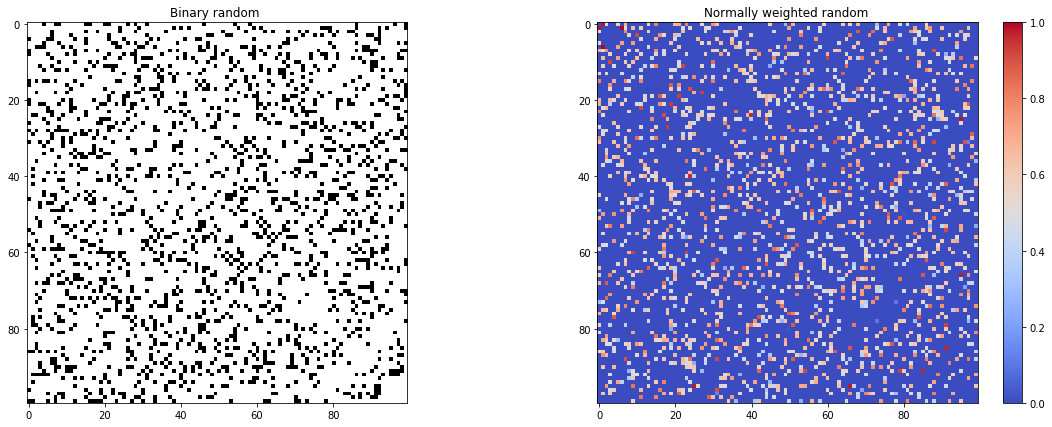

In [4]:

# Initializes random symmetric binary and weighted (weights taken from normal distribution) networks
ArandBinary = net.generateBinaryRandSymAdj(vertices, edges)
ArandWeight = net.generateWeightRandSymAdj(vertices, edges, weightDistribution='normal',mu = 1., sig = 0.25)

#plot the adjacency matrices
plt.rcParams['figure.figsize'] = [20, 7]

plt.subplot(1,2,1)
plotAdj(ArandBinary, 'Greys', 'Binary random ',12, reorderingFlag = False, ticksFlag = False)

plt.subplot(1,2,2)
plotAdj(ArandWeight, 'coolwarm', 'Normally weighted random ',12, reorderingFlag = False, ticksFlag = False, colorbarFlag = True)

#plt.show()

## Rewiring based on Heat diffusion (Jarman et. al. , 2017) 

<html>
<body>  

<p>
<b>Step 1:</b> Generate a random symmetric adjacency matrix
</p>  
<p>
<b>Step 2:</b> Select uniformly at random a node v with nonzero degree 
    $v \in \{u \in V | d_u \neq 0 \quad \textrm{and} \quad   d_u \neq n-1\}$     
</p> 
<p>  
<b>Step 3:</b> With probabiliity P(rewire) go to step 4.1 (heat diffusion rewiring step), otherwise go to step 4.2 (random rewiring step)        
</p>  

<p>  
<b>Step 4.1 (heat diffusion rewiring step):</b> For the set parameter t = τ, calculate the heat kernel, h(τ). Select the vertex $u_1$ that has the minimum value among the vertices connected to v: $$u_1 = argmin_u {h_{vu}(τ)}| (v,u) \in E$$  <p> Select the vertex $u_2$ with the maximum value among the nodes not connected to v:</p>  $$u_2 = argmax_u {h_{vu}(τ)}| (v,u) \in E^c$$ Disconnect $u_1$ from v, connect $u_2$ to v.    
</p> 

<p>  
<b>Step 4.2 (random rewiring step):</b> Pick at random a node $u_1$ connected to v $u_1 \in \{u \in V |(u,v) \in E\}$, and a node $u_2$ not connected to it $u_2 \in \{u \in V |(u,v) \in E^c\}$. Disconnect $u_1$ from v; connect $u_2$ to v.      
</p>

<p> 
<b>Step 5:</b> Go back to step 2, until k rewirings    
</p> 

<b>
Jarman, N., Steur, E., Trengove, C., Tyukin, I. Y., & Van Leeuwen, C. (2017). Self-organisation of small-world networks by adaptive rewiring in response to graph diffusion. Scientific reports, 7(1), 13158.
</b>     
 


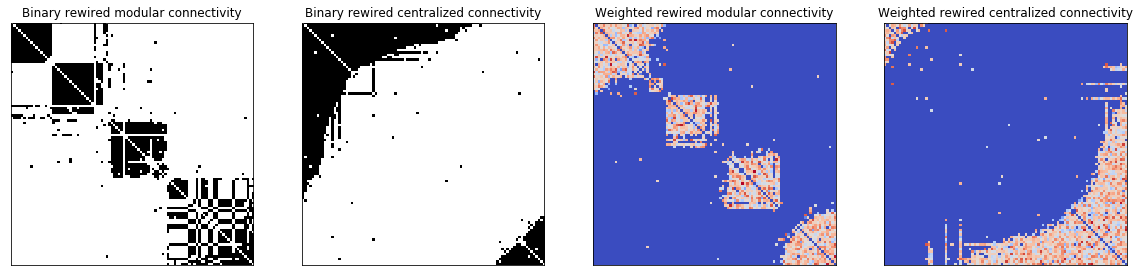

In [5]:
rewirings = 4000
pRandRewire = 0.2
tauMod = 3
tauCentra = 5 

####REWIRING
#Rewiring based on heat diffusion, two BINARY examples
AModBinary = net.rewireHeatKernel(ArandBinary, pRandRewire, rewirings, tauMod)
ACentraBinary = net.rewireHeatKernel(ArandBinary, pRandRewire, rewirings, tauCentra)

#Rewiring based on heat diffusion, two WEIGHTED examples
AModWeight = net.rewireHeatKernel(ArandWeight, pRandRewire, rewirings, tauMod)
ACentraWeight = net.rewireHeatKernel(ArandWeight, pRandRewire, rewirings, tauCentra)

####PLOTTING
plt.rcParams['figure.figsize'] = [20, 7]

plt.subplot(1,4,1)
plotAdj(AModBinary, 'Greys', 'Binary rewired modular connectivity')

plt.subplot(1,4,2)
plotAdj(ACentraBinary, 'Greys','Binary rewired centralized connectivity')

plt.subplot(1,4,3)
plotAdj(AModWeight, 'coolwarm','Weighted rewired modular connectivity')

plt.subplot(1,4,4)
plotAdj(ACentraWeight, 'coolwarm','Weighted rewired centralized connectivity')

plt.show()



## Rewiring based on Coupled maps (Gong and van Leeuwen, 2004) 



<h2>A rewiring regime based on dynamic coherence among units confers small world structure to randomly connected networks </h2>

<p> Below is a brief description of the model by Gong and van Leeuwen (2004). The authors investigate how a randomly connected network with chaotic units evolves under a rewiring regime, where units with similar activities connect and ones with divergent activities disconnect. The activities of the units are dictated by coupled logistic maps according to the equation: $$ x^{i}_{n+1} = (1-ε)f(x_n^i)+ \frac{ε}{M_i}\sum_{j \in B(i)/}f(x_n^j) \quad\quad\quad  (1) $$
The strength of the coupling is controlled by the ε parameter, the dynamics of the map by the a parameter a in the logistic map equation: $$ f(x) = 1 - ax^2  \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad (2)$$ $M_i$ and $B(i)$ in equation 1 are the number and set of connected to i nodes, respectively. The coherence between units is defined as the absolute value of the difference in their activities. $$d_{ij}(n) = |x_n^i - x_n^j|  \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad  (3)  $$  
</p>  
<p> Below is a description of the rewiring algorithm. Note that the connections are unweighted.</p>


<h3> Coupled Maps rewiring algorithm </h3>

<p>
<b>Step 1: </b> Generate a random symmetric Erdos-Renyi graph G = (V,E), with |V| = n nodes and $|E|= 2*{\log n}(n-1)$ edges. Activate each of the nodes with a random value between -1 and 1.   
</p> 

<p>
<b>Step 2: </b> For a transient time T, update the activations of the nodes according to equation (2) without performing any rewiring
</p>

<p>
<b>Step 3: </b> From time T+1, and after each iteration pick a node <i>i</i> at random and calculate $d_{ij}(t_{iter})$ for all nodes <i>j</i>.From all the nodes, pick the one, $j_1$, that gives the minimum  value. From the nodes that are connected, pick the one, $j_2$ , that gives the maximum value.   
</p>

<p>
<b>Step 4: </b> If node $j_1$ is connected to node <i>i</i>, do nothing. If they are not connected, connect them and also disconnect node $j_2$ with i.  
</p>

<p>
<b>Step 5:</b>Go back to step 2, until k rewirings
</p>


<b>     
Gong, P., & van Leeuwen, C. (2004). Evolution to a small-world network with chaotic units. EPL (Europhysics Letters), 67(2), 328.    
</b>  

In [6]:
transientTime = 6000; couplingStrength = 0.5; alpha = 1.7
rewirings = [0, 1000, 2000, 4000, 8000]
ABinary = np.zeros((vertices,vertices,len(rewirings)))
AWeight = np.zeros((vertices,vertices,len(rewirings)))

for count, rewiring in enumerate(rewirings):
    ABinary[:,:,count] = net.rewireCoupledMap(ArandBinary, transientTime, rewiring, couplingStrength, alpha)
    AWeight[:,:,count] = net.rewireCoupledMap(ArandWeight, transientTime, rewiring, couplingStrength, alpha)

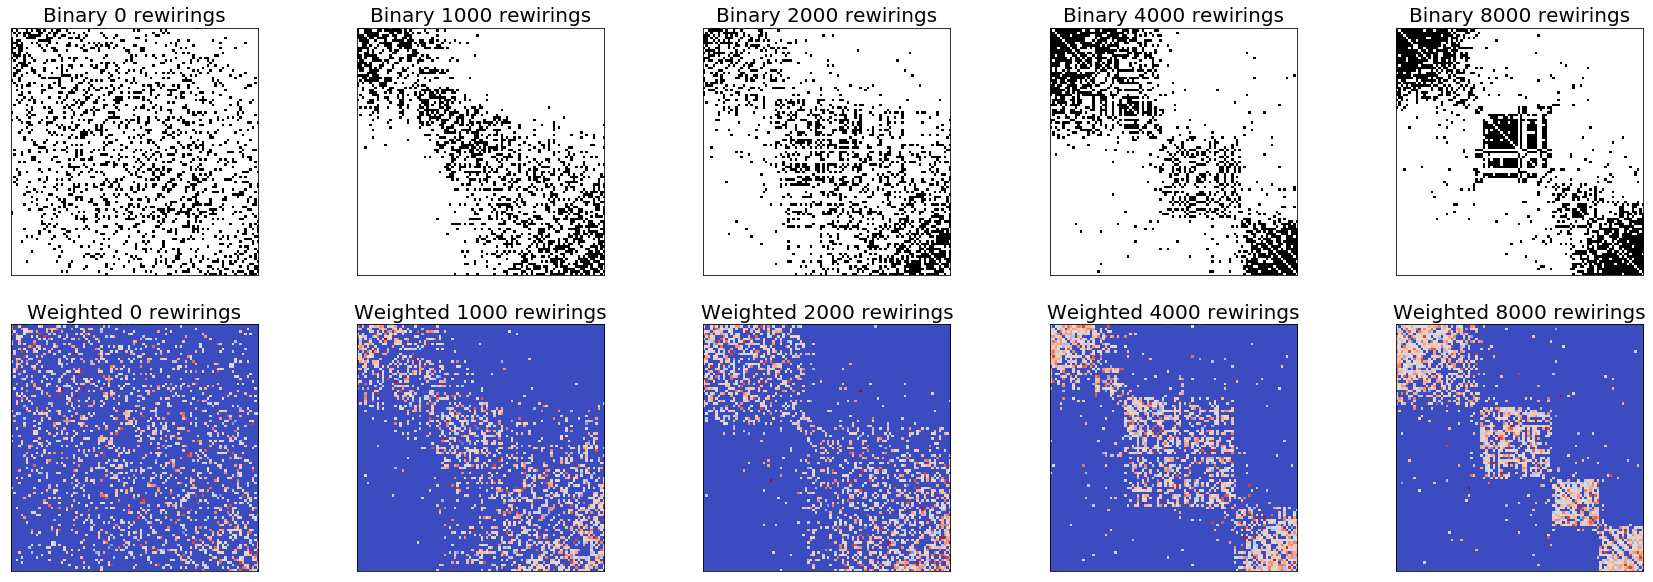

In [7]:
num = ABinary.shape[2]
totalNum = 2*num
plt.rcParams['figure.figsize'] = [30, 10]
for i in np.arange(num):
    
    plt.subplot(2,num,i+1)
    ttl = 'Binary ' +str(rewirings[i])+' rewirings' 
    plotAdj(ABinary[:,:,i], 'Greys', ttl, 20)
    
    plt.subplot(2,num,num+i+1)
    ttl = 'Weighted ' +str(rewirings[i])+' rewirings' 
    plotAdj(AWeight[:,:,i], 'coolwarm', ttl, 20)


## Rewiring based on the seminal work on small world networks by Watts and Strogatz  (1998)


<p> The Watts and Strogatz algorithm starts with a regular ring lattice network and goes through all the nodes' edges of the network. More specifically, for every node i, the algorithm goes through i's connections separately, it cuts its connection with probability p, and rewire it randomly (that is i can be re-connected to any other node with uniform distribution). For a large range of p values the network shows small world characteristics, that is it maintains its large clustering coefficient, but also have small path length.
</p>
<p> The variation of the Watts and Strogatz algorithm I show here, does not go systematically through all the edges but rather every time picks a random edge. It performs this operation for a number of times specified by the user.  
</p>

<b>
Watts, D. J., & Strogatz, S. H. (1998). Collective dynamics of ‘small-world’networks. Nature, 393(6684), 440.
</b>  



In [8]:
#Initialization -variables
vertices = 1000
neighbors = 20
weightDistribution = 'binary'
pRewires = [0,0.1,0.2,0.4,0.8,1]
ARew1 = np.zeros((vertices,vertices,len(pRewires)))
ARew2 = np.zeros((vertices,vertices,len(pRewires)))
iterations = neighbors*2*vertices #used the variation algorithm

#initialization-make a regular matrix
AReg = net.createRegularAdjMatrix(vertices, neighbors, weightDistribution)

# Apply Watts-Strogatz algorithm and its variation for different pRewires
for ind,p in enumerate(pRewires):
    ARew1[:,:,ind] = net.rewireSWN(AReg, p)
    ARew2[:,:,ind] = net.rewireSWNVariation(AReg, p, iterations)
    



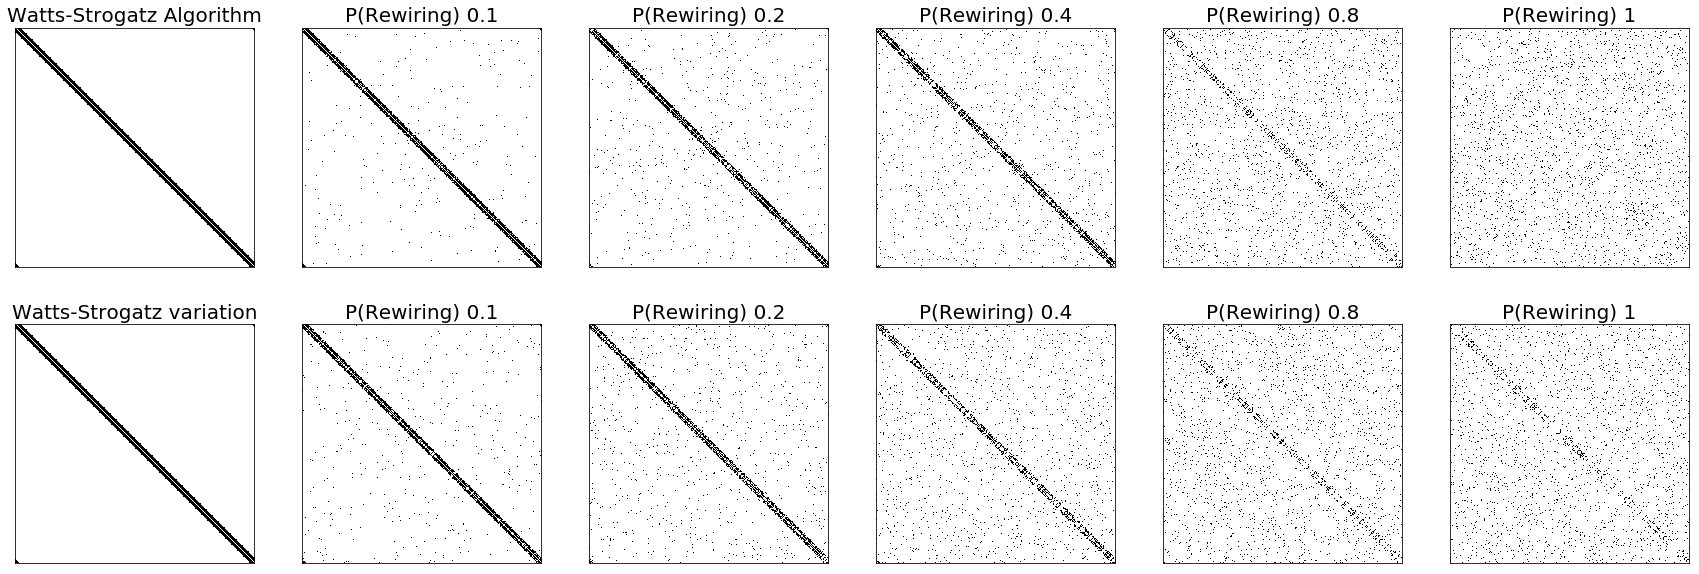

In [9]:
num = ARew1.shape[2]
totalNum = 2*num

plt.rcParams['figure.figsize'] = [30, 10]
for i in np.arange(num):
    
    plt.subplot(2,num,i+1)
    if i == 0:
        ttl = 'Watts-Strogatz Algorithm' 
    else:
        ttl = 'P(Rewiring) ' +str(pRewires[i])
        
    plotAdj(ARew1[:,:,i], 'Greys', ttl, 20, False)


    plt.subplot(2,num,num+i+1)
    if i == 0:
        ttl = 'Watts-Strogatz variation'
    else:
        ttl = 'P(Rewiring) ' +str(pRewires[i])
        
    plotAdj(ARew2[:,:,i], 'Greys', ttl, 20, False)
